In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#Check the number of mice
merge_df.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merge_df.loc[merge_df['Mouse ID'] == "g989", :]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.drop(merge_df.index[merge_df['Mouse ID'] == 'g989'], inplace=True)
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
merge_df.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Create variables using groupby to caluclate summary stats

mean_tumor = merge_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

median_tumor = merge_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

var_tumor = merge_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

std_tumor = merge_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

sem_tumor = merge_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [8]:
#Generate new summary stats dataframe using variables generated above
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                             "Median Tumor Volume": median_tumor,
                             "Tumor Volume Variance": var_tumor,
                             "Tumor Volume Std. Dev.": std_tumor,
                             "Tumor Volume Std. Err": sem_tumor})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#group_data = df
#group data agg

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_and_drugs = merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

mice_and_drugs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

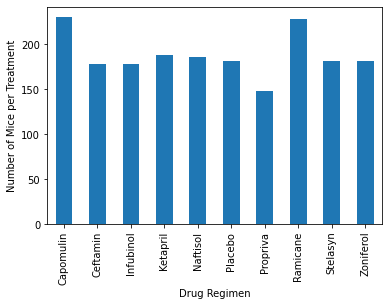

In [11]:
#Pandas bar plot
mice_and_drugs.plot(kind='bar', ylabel='Number of Mice per Treatment')

plt.show()

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#Convert series to frame to use for pyplot
mice_drugs = pd.Series(mice_and_drugs)

mice_drugs.to_frame()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


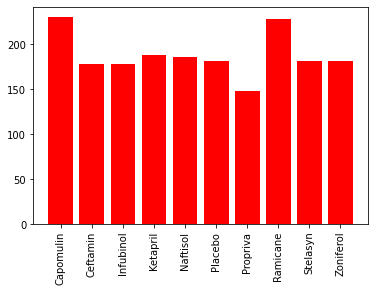

In [13]:
#Define x_axis and tick locations
x_axis = np.arange(len(mice_drugs))
tick_locations = [value for value in x_axis]

#Create drug name list for tick locations
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", 
         "Ramicane", "Stelasyn", "Zoniferol"]

#Generate bar graph using pylot
plt.bar(x_axis, mice_drugs, color='r')
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = merge_df['Sex'].value_counts()
mice_sex

Male      958
Female    922
Name: Sex, dtype: int64

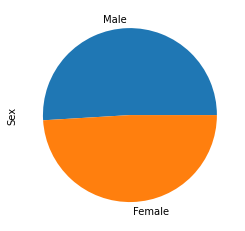

In [15]:
mice_sex.plot(kind='pie')
plt.show()

([<matplotlib.patches.Wedge at 0x7f91cea54af0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

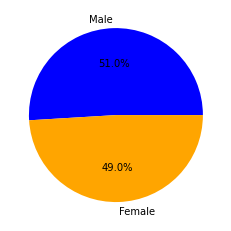

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

values = [958, 922]

colors = ["blue", "orange"]

plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = merge_df.groupby(['Mouse ID']).max()['Timepoint']
last_tp

tumor_volume = pd.merge(last_tp, merge_df, how="left", on=("Mouse ID", "Timepoint"))
tumor_volume.set_index(["Mouse ID"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
        tumor = (tumor_volume.loc[tumor_volume['Drug Regimen'] == treatment,'Tumor Volume (mm3)'])
        tumor_vol.append(tumor)
        quartiles = tumor.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = [x for x in tumor if (x > upper_bound) or (x < lower_bound)]
        #print(f"Values below {lower_bound} for {treatment} could be outliers.")
        #print(f"Values above {upper_bound} for {treatment} could be outliers.")
        print(f"{treatment} 's outliers: {outliers}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
  
    
    # Determine outliers using upper and lower bounds


Capomulin 's outliers: []
Ramicane 's outliers: []
Infubinol 's outliers: [36.321345799999996]
Ceftamin 's outliers: []


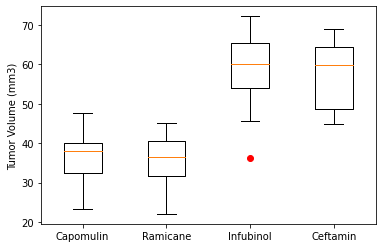

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, labels=treatments, sym='r')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

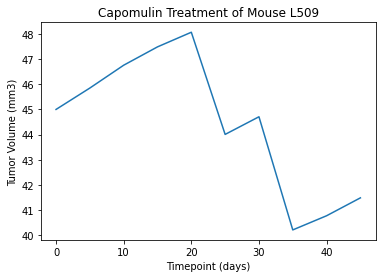

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = merge_df.loc[merge_df['Mouse ID'] == "l509", :]
cap_mouse

x_axis = cap_mouse['Timepoint']
tumor_data = cap_mouse['Tumor Volume (mm3)']

tumor_by_time = plt.plot(x_axis, tumor_data)
plt.title('Capomulin Treatment of Mouse L509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

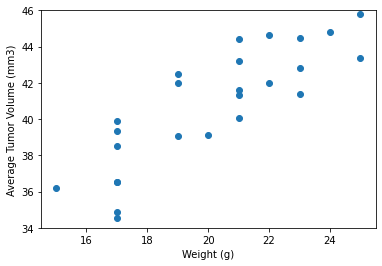

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_treatment_df = merge_df[merge_df['Drug Regimen']=='Capomulin']

tumor_mean = cap_treatment_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

mouse_weight = cap_treatment_df.groupby(['Mouse ID']).max()['Weight (g)']


plt.scatter(mouse_weight, tumor_mean)
plt.ylim(34, 46)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse weight and the average tumor volume is 0.8419363424694718


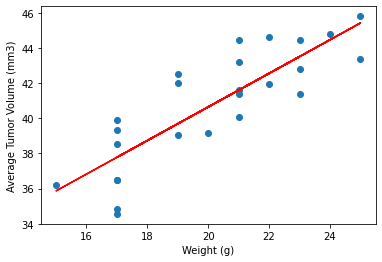

In [40]:
x_values = mouse_weight
y_values = tumor_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#Regression formula
regress_values = x_values * slope + intercept
#Equation of the line to print on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")